<a href="https://colab.research.google.com/github/Sibgat-Ul/Road_Accidents_Pakistan_Prediction/blob/main/toonsquad_445_7_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Group_Name: ToonSquad
    - Imroz Rahim - 2011129
    - Iffaat Ara Mehnaz - 2031340
    - Sibgat Ul Islam - 2111920
   
EDA and Pre-Processing

In [309]:
!git clone https://github.com/Sibgat-Ul/Road_Accidents_Pakistan_Prediction/ && mv ./Road_Accidents_Pakistan_Prediction/* ./

fatal: destination path 'Road_Accidents_Pakistan_Prediction' already exists and is not an empty directory.


### Import the libraries

In [310]:
import pandas as pd
import numpy as np
from openpyxl.styles.builtins import total

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

### Few helper functions:

In [311]:
def get_cat_cols(df: pd.DataFrame) -> list:
    """"
    :param df: Dataframe
    :return: list of column names

    to get categorical columns
    """
    return [col for col in df.columns if df[col].dtype == 'object']

def get_num_cols(df):
    """"
    :param df: Dataframe
    :return: list of column names

    to get num columns
    """
    return [col for col in df.columns if df[col].dtype != 'object']

def get_info(dataset: pd.DataFrame):
    """

    :param dataset: pd.DataFrame
    :return: pd.DataFrame

    Makes a new df with missing and unique values.
    """
    new_df = pd.DataFrame()
    new_df['missing_count'] = dataset.isnull().sum()
    new_df['total'] = dataset.shape[0]
    new_df['missing%'] = (dataset.isnull().sum() / dataset.shape[0])*100
    new_df['n_unique'] = dataset.nunique()
    new_df['type'] = dataset.dtypes
    print(f"Size: {rta_dataset.shape}")
    return new_df

### File imports

In [354]:
# Importing the dataset

rta_dataset = pd.read_excel('./data/RTA Data 2020 to July 2023.xlsx')
cat_cols = get_cat_cols(rta_dataset)
num_cols = get_num_cols(rta_dataset)

### Some info of our dataset

In [355]:
info_df = get_info(rta_dataset)
info_df

Size: (46189, 25)


,missing_count,total,missing%,n_unique,type
EcYear,0,46189,0.000000,5,object
EcNumber,7211,46189,15.611942,34800,object
CallTime,5956,46189,12.894845,40170,datetime64[ns]
EmergencyArea,1,46189,0.002165,37520,object
TotalPatientsInEmergency,0,46189,0.000000,13,object
Gender,1,46189,0.002165,4,object
Age,1,46189,0.002165,100,float64
HospitalName,21950,46189,47.522137,162,object
Reason,1,46189,0.002165,23940,object
responsetime,5,46189,0.010825,68,float64


In [356]:
rta_dataset

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,2023,NaN,NaT,Infront Of Mian G hotel GT Road Mandra,2,Male,20.0,"RHC,Mandra,Rawalpindi",.,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
46185,2023,356986,2023-01-01 04:23:00,"Barma Shell Depu Dhoke Munshi Road, Fazal Town...",1,Male,16.0,DHQ,Bike slipped due to over speed.(RIN.6276) C D...,11.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46186,2023,356981,2023-01-01 02:16:00,Main Bakra Mandi Chowk Rwp,1,Female,10.0,NaN,RLF-2193 coure and ICT-593 corolla car colliped,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46187,2023,356980,2023-01-01 02:02:00,"Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp",1,Male,19.0,NaN,Bike slipped due to Over speed ( Bike no TSH ...,12.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Checking the unique values

In [357]:
target_column = 'PatientStatus'

filtered_cols = rta_dataset[info_df[info_df['n_unique'] < 15].index]
unique_values = [{f'{col}: {rta_dataset[col].unique()}'} for col in filtered_cols.columns]
unique_values

[{"EcYear: [2020 2021 2022 'Hospital' 2023]"},
 {"TotalPatientsInEmergency: [1 2 3 4 8 6 5 10 7 11 9 'Alive & unstable' 15]"},
 {"Gender: ['Male' 'Female' 'Other' nan 0]"},
 {"EducationTitle: ['Intermediate' 'Illetrate' 'Matric' 'Primary' 'Graduation' 'Masters'\n 'Middle' 'PHD' nan 0]"},
 {"InjuryType: ['Minor' 'Single Fracture' 'Head Injury' 'Multiple Fractures'\n 'Spinal Injury' nan]"},
 {"Cause: ['Over Speed' 'Carelessness' 'Tyre Burst' 'U Turn' 'Others' 'Wrong Turn'\n 'One Wheeling' nan]"},
 {"PatientStatus: ['Alive & unstable' 'Alive & stable' 'Dead' nan]"},
 {'BicycleInvovled: [ 0.  1.  2. nan]'},
 {'BikesInvolved: [ 1.  0.  2.  3. 10. nan]'},
 {'BusesInvolved: [ 0.  1.  2. nan]'},
 {'CarsInvolved: [ 0.  1.  2.  3.  4. nan  5.]'},
 {'CartInvovled: [ 0.  1. nan]'},
 {'RickshawsInvolved: [ 0.  1.  2. nan]'},
 {'TractorInvovled: [ 0.  1. nan]'},
 {'TrainsInvovled: [ 0.  1. nan]'},
 {'TrucksInvolved: [ 0.  1.  2.  3. nan]'},
 {'VansInvolved: [ 0.  1.  2.  4.  3. nan]'},
 {'OthersInvo

### Processing
- We will drop the columns with the most missing values
- drop the rows having problematic values (EcYear with Hospital, 0 for Gender)

We have considered dropping rather than filling the values because there are enough samples available.

In [358]:
def drop_garbage_rows(df, col, to_drop):
    df.drop(index=df[df[col] == to_drop].index, axis=0, inplace=True)

drop_garbage_rows(rta_dataset, "EcYear", "Hospital")
drop_garbage_rows(rta_dataset, "Gender", 0)
drop_garbage_rows(rta_dataset, "TotalPatientsInEmergency", 'Alive & unstable')
drop_garbage_rows(rta_dataset, "EducationTitle", 0)

In [359]:
rta_dataset.drop(columns=['HospitalName', 'EcNumber'], inplace=True)

##### There are 46k data on the dataset, but call time has around 6000 data missing, so if we drop the null values, <br> we would still have at least 40k samples to work with.

In [360]:
rta_dataset.drop(index=rta_dataset[rta_dataset['CallTime'].isnull()].index, inplace=True)

In [361]:
# Another problematic row
rta_dataset[rta_dataset["Gender"].isnull()]

,EcYear,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
31355,2022,2022-06-18 13:23:00,"Near 502 Park, Adyala Road Rawalpindi.",2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Few more problematic rows

In [362]:
rta_dataset.drop(index=rta_dataset[rta_dataset["Gender"].isnull()].index, inplace=True)
rta_dataset.drop(index=rta_dataset[rta_dataset["EmergencyArea"].isnull()].index, inplace=True)
rta_dataset.drop(index=rta_dataset[rta_dataset["responsetime"].isnull()].index, inplace=True)

### No missing values after processing

and we even have enough samples to train the model.

In [363]:
get_info(rta_dataset)

Size: (40227, 23)


,missing_count,total,missing%,n_unique,type
EcYear,0,40227,0.0,4,object
CallTime,0,40227,0.0,40164,datetime64[ns]
EmergencyArea,0,40227,0.0,37237,object
TotalPatientsInEmergency,0,40227,0.0,12,object
Gender,0,40227,0.0,3,object
Age,0,40227,0.0,98,float64
Reason,0,40227,0.0,22010,object
responsetime,0,40227,0.0,68,float64
EducationTitle,0,40227,0.0,8,object
InjuryType,0,40227,0.0,5,object


In [364]:
cat_cols = get_cat_cols(rta_dataset)
num_cols = get_num_cols(rta_dataset)

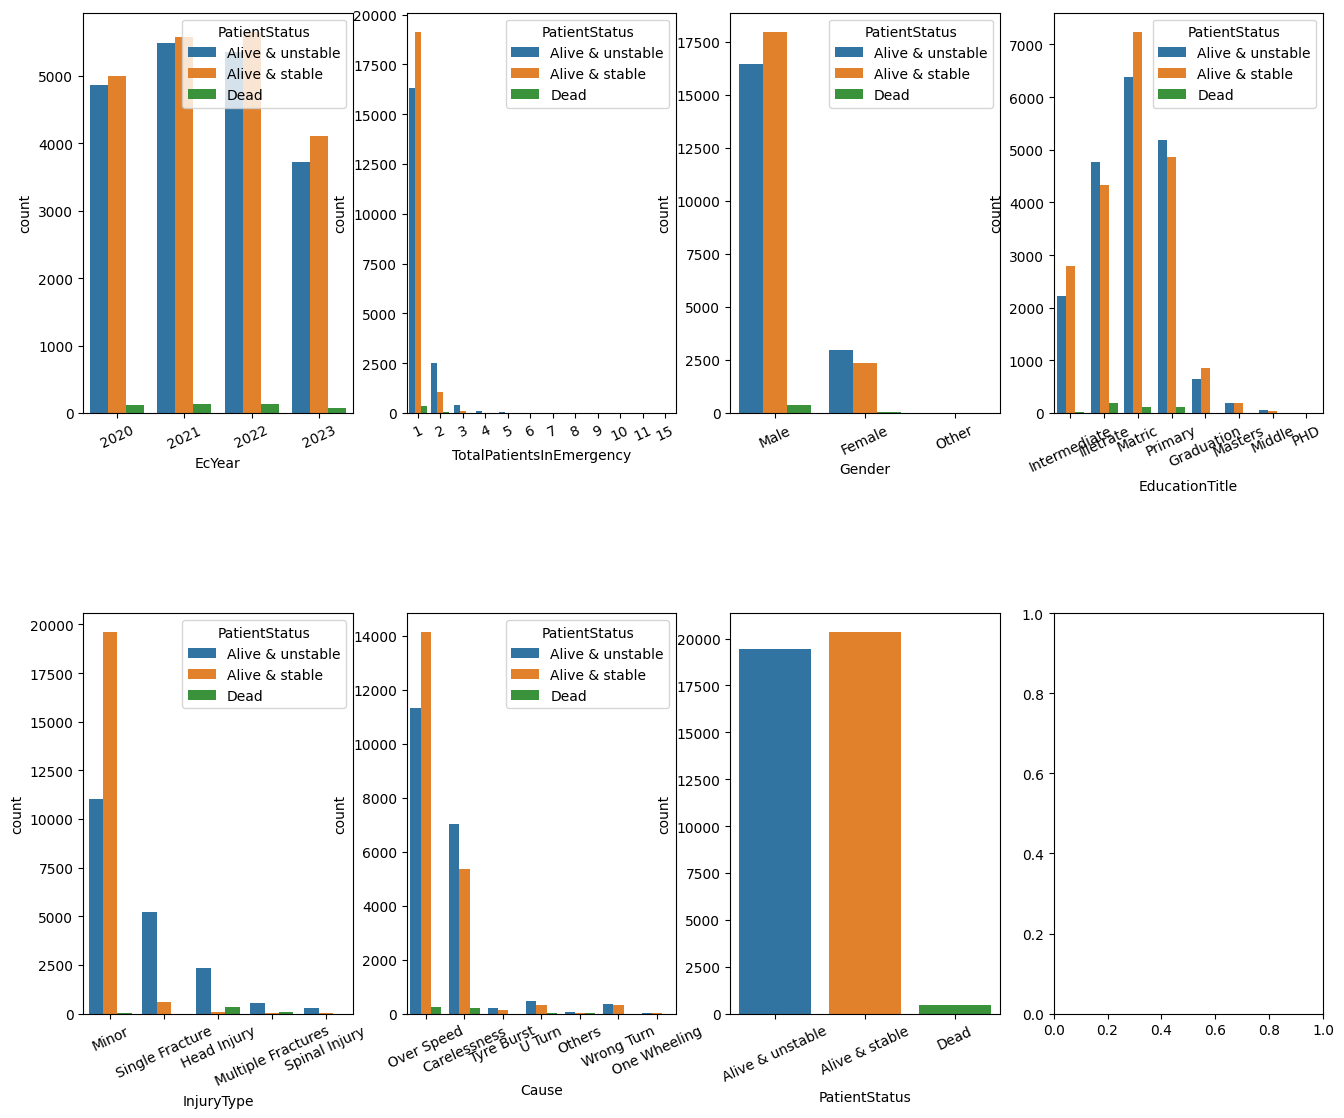

In [365]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 13))
plt.subplots_adjust(hspace=.5)

r, c = 0, 0

for col in filtered_cols:
    if col in cat_cols:
        plot = sns.countplot(data=rta_dataset, x=rta_dataset[col], hue='PatientStatus', ax=axes[r, c])
        plot.set_xticklabels(plot.get_xticklabels(), rotation=25)

    if c < 3:
        c = c + 1
    else:
        c = 0
        if r < 1:
            r = r + 1

plt.show()

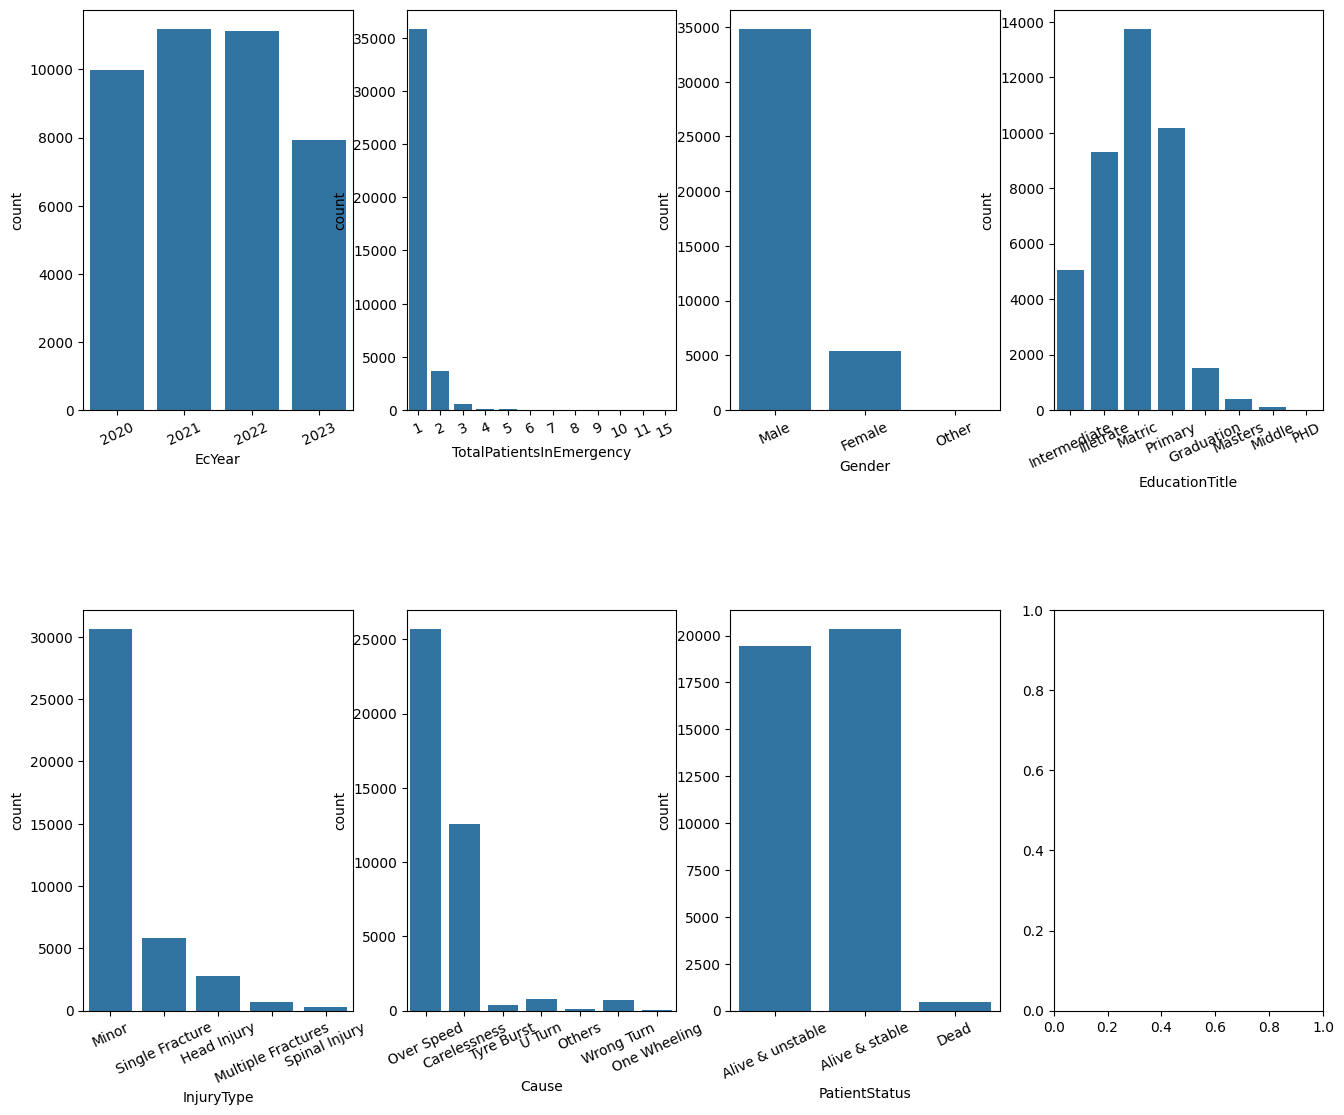

In [350]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 13))
plt.subplots_adjust(hspace=.5)

r, c = 0, 0

for col in filtered_cols.columns:
    if col in cat_cols:
        plot = sns.countplot(data=rta_dataset, x=rta_dataset[col], ax=axes[r, c])
        plot.set_xticklabels(plot.get_xticklabels(), rotation=25)
    if c < 3:
        c = c + 1
    else:
        c = 0
        if r < 1:
            r = r + 1

plt.show()

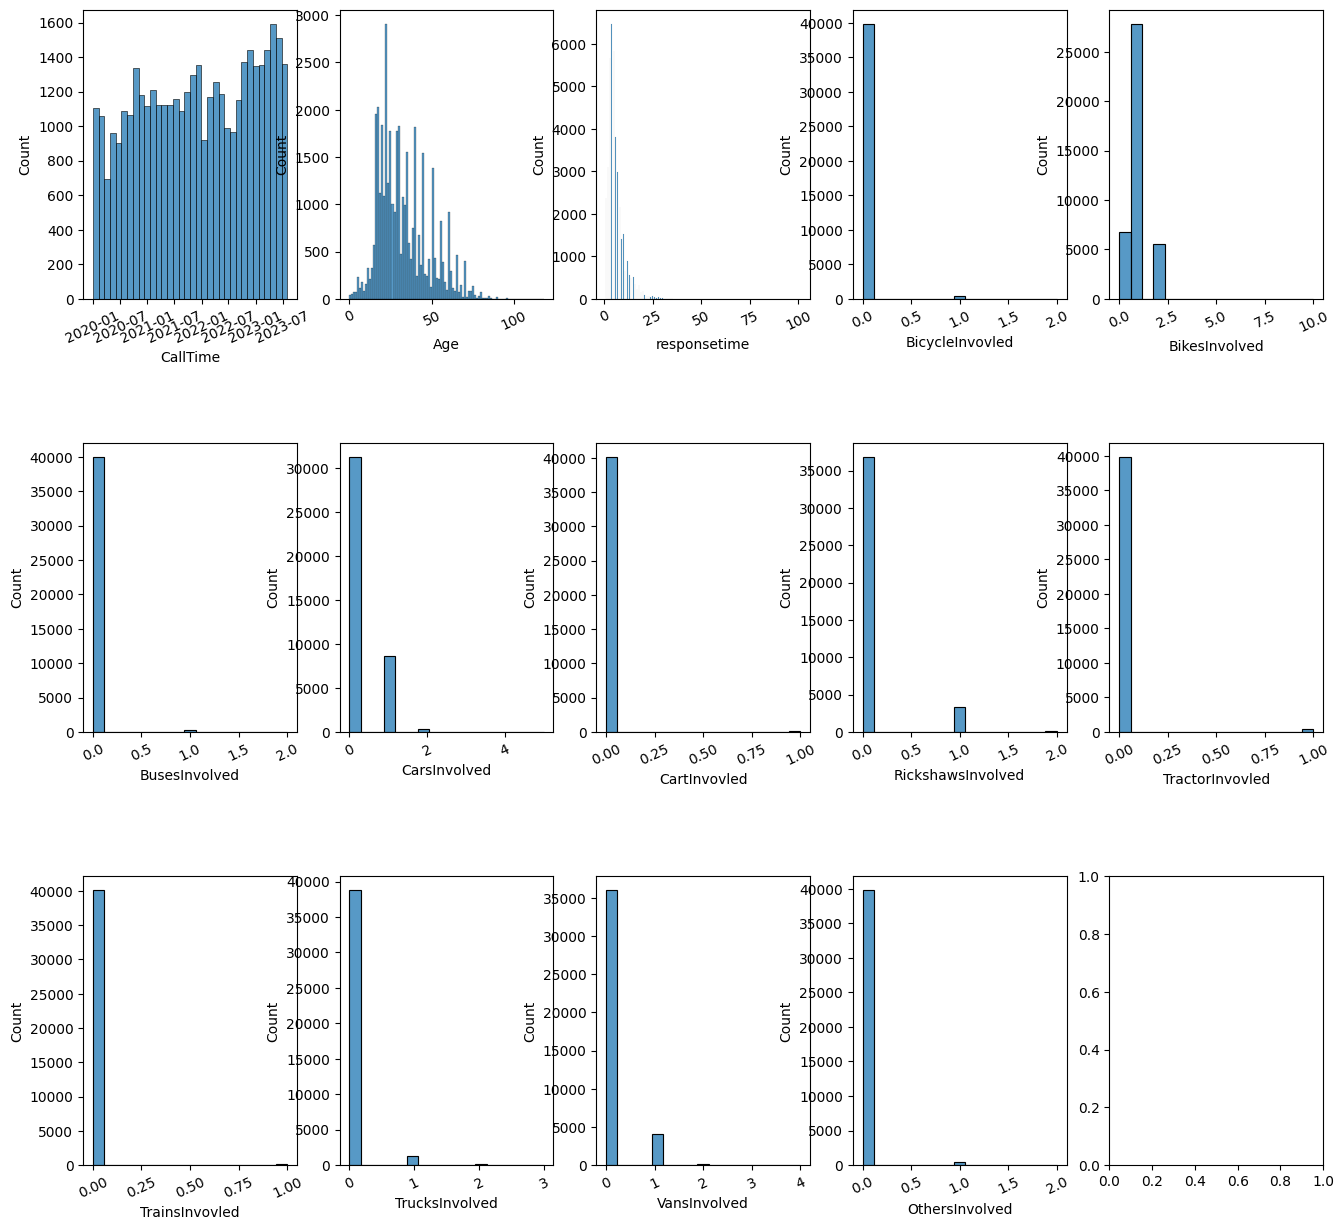

In [325]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16, 15))
plt.subplots_adjust(hspace=.5)

r, c = 0, 0

for col in num_cols:
    plot = sns.histplot(data=rta_dataset, x=col, ax=axes[r, c])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=25)
    if c < 4:
        c = c + 1
    else:
        c = 0
        if r < 2:
            r = r + 1


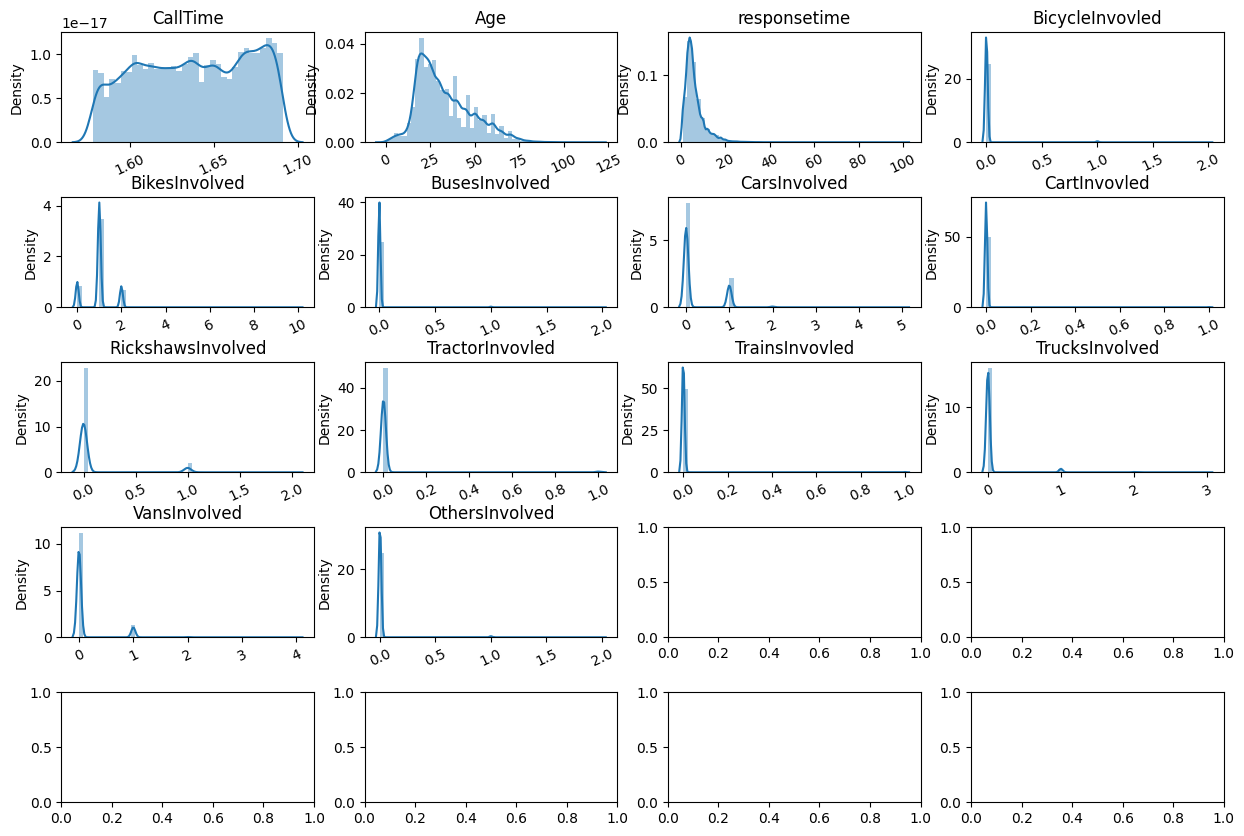

In [326]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
plt.subplots_adjust(hspace=.5)

r, c = 0, 0

for col in num_cols:
    plot = sns.distplot(x=rta_dataset[col], ax=axes[r, c])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=25)
    plot.set_title(col)
    if c < 3:
        c = c + 1
    else:
        c = 0
        if r < 4:
            r = r + 1


<Axes: xlabel='PatientStatus', ylabel='count'>

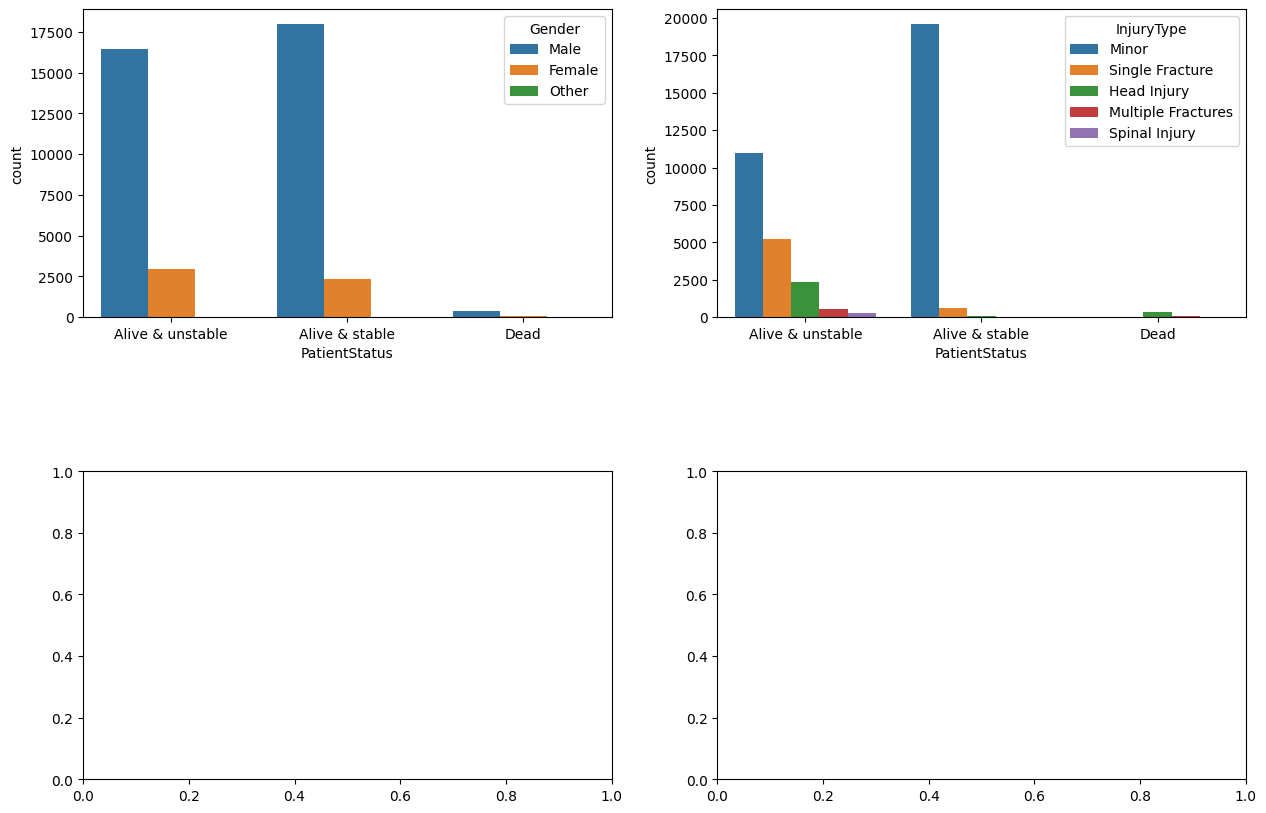

In [327]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=.5)

sns.countplot(data=rta_dataset, x='PatientStatus', hue='Gender', ax=axes[0,0])

sns.countplot(data=rta_dataset, x='PatientStatus', hue='InjuryType', ax=axes[0,1])

# plot3 = sns.countplot(data=rta_dataset, x='CallTime', hue='PatientStatus', ax=axes[1,0])
# plot3.set_xticklabels(plot3.get_xticklabels(), rotation=80)

# sns.countplot(data=rta_dataset, x='PatientStatus', hue='Gender', ax=axes[1,1])

<Axes: >

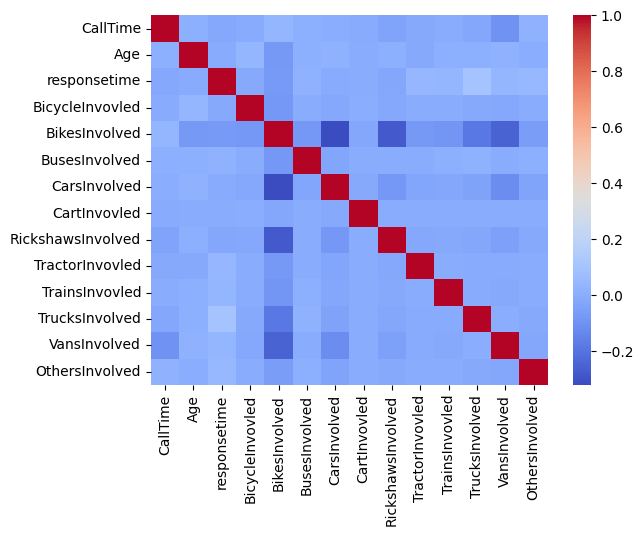

In [328]:
sns.heatmap(rta_dataset[num_cols].corr(), cmap='coolwarm')

In [329]:
rta_dataset['Reason']

,Reason
0,Bike Slip
1,Car hit Footpath
2,Rickshaw hit with Car
3,Car hit Car and runaway
4,Unknown Bike hit Bike and runaway
...,...
46183,Sazuki RIT 2078 ny unknown truck ko pechay sey...
46185,Bike slipped due to over speed.(RIN.6276) C D...
46186,RLF-2193 coure and ICT-593 corolla car colliped
46187,Bike slipped due to Over speed ( Bike no TSH ...


### Getting Unique Values

In [366]:
filtered_cols = rta_dataset[info_df[info_df['n_unique'] < 10].index]
to_encode = [{col: rta_dataset[col].unique()} for col in filtered_cols.columns if col in cat_cols]
to_encode

[{'EcYear': array([2020, 2021, 2022, 2023], dtype=object)},
 {'Gender': array(['Male', 'Female', 'Other'], dtype=object)},
 {'EducationTitle': array(['Intermediate', 'Illetrate', 'Matric', 'Primary', 'Graduation',
         'Masters', 'Middle', 'PHD'], dtype=object)},
 {'InjuryType': array(['Minor', 'Single Fracture', 'Head Injury', 'Multiple Fractures',
         'Spinal Injury'], dtype=object)},
 {'Cause': array(['Over Speed', 'Carelessness', 'Tyre Burst', 'U Turn', 'Others',
         'Wrong Turn', 'One Wheeling'], dtype=object)},
 {'PatientStatus': array(['Alive & unstable', 'Alive & stable', 'Dead'], dtype=object)}]

In [368]:
rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].apply(lambda x : x.lower())

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=r".*(rwp|rawalpindi).*",
    value="Rawalpindi",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=
    r".*(gt road|g.t road|g t road).*",
    value="GT Road",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=
    r".*(chowk).*",
    value="Chowk",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=
    r".*(i\.j\.p).*",
    value="IJP Road",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=
    r".*(mandra).*",
    value="Mandra",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=r".*(faizabad|faiza bad).*",
    value="Faizabad",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=r".*(isb).*",
    value="Isb",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=r".*(peshwar).*",
    value="Peshwar",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=r".*(sayidan|syedan).*",
    value="Sayidan",
    regex=True
)

In [369]:
rta_dataset['EmergencyArea']

,EmergencyArea
0,Rawalpindi
1,Rawalpindi
2,Rawalpindi
3,Rawalpindi
4,Rawalpindi
...,...
46183,GT Road
46185,"barma shell depu dhoke munshi road, fazal town..."
46186,Rawalpindi
46187,Rawalpindi


In [378]:
rta_dataset['EmergencyArea'].nunique()

4364

### Looking for the most accident-prone areas

In [371]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


danger_zone = [
    {status: Counter(rta_dataset[rta_dataset['PatientStatus'] == status]['EmergencyArea'].values)} for status in to_encode[5]['PatientStatus']
]

In [372]:
top_20_dead_zone = danger_zone[2]['Dead'].most_common()[:20]
top_20_unstable_zone = danger_zone[0]['Alive & unstable'].most_common()[:20]
top_20_stable_zone = danger_zone[1]['Alive & stable'].most_common()[:20]

Text(0.5, 1.0, 'Stable')

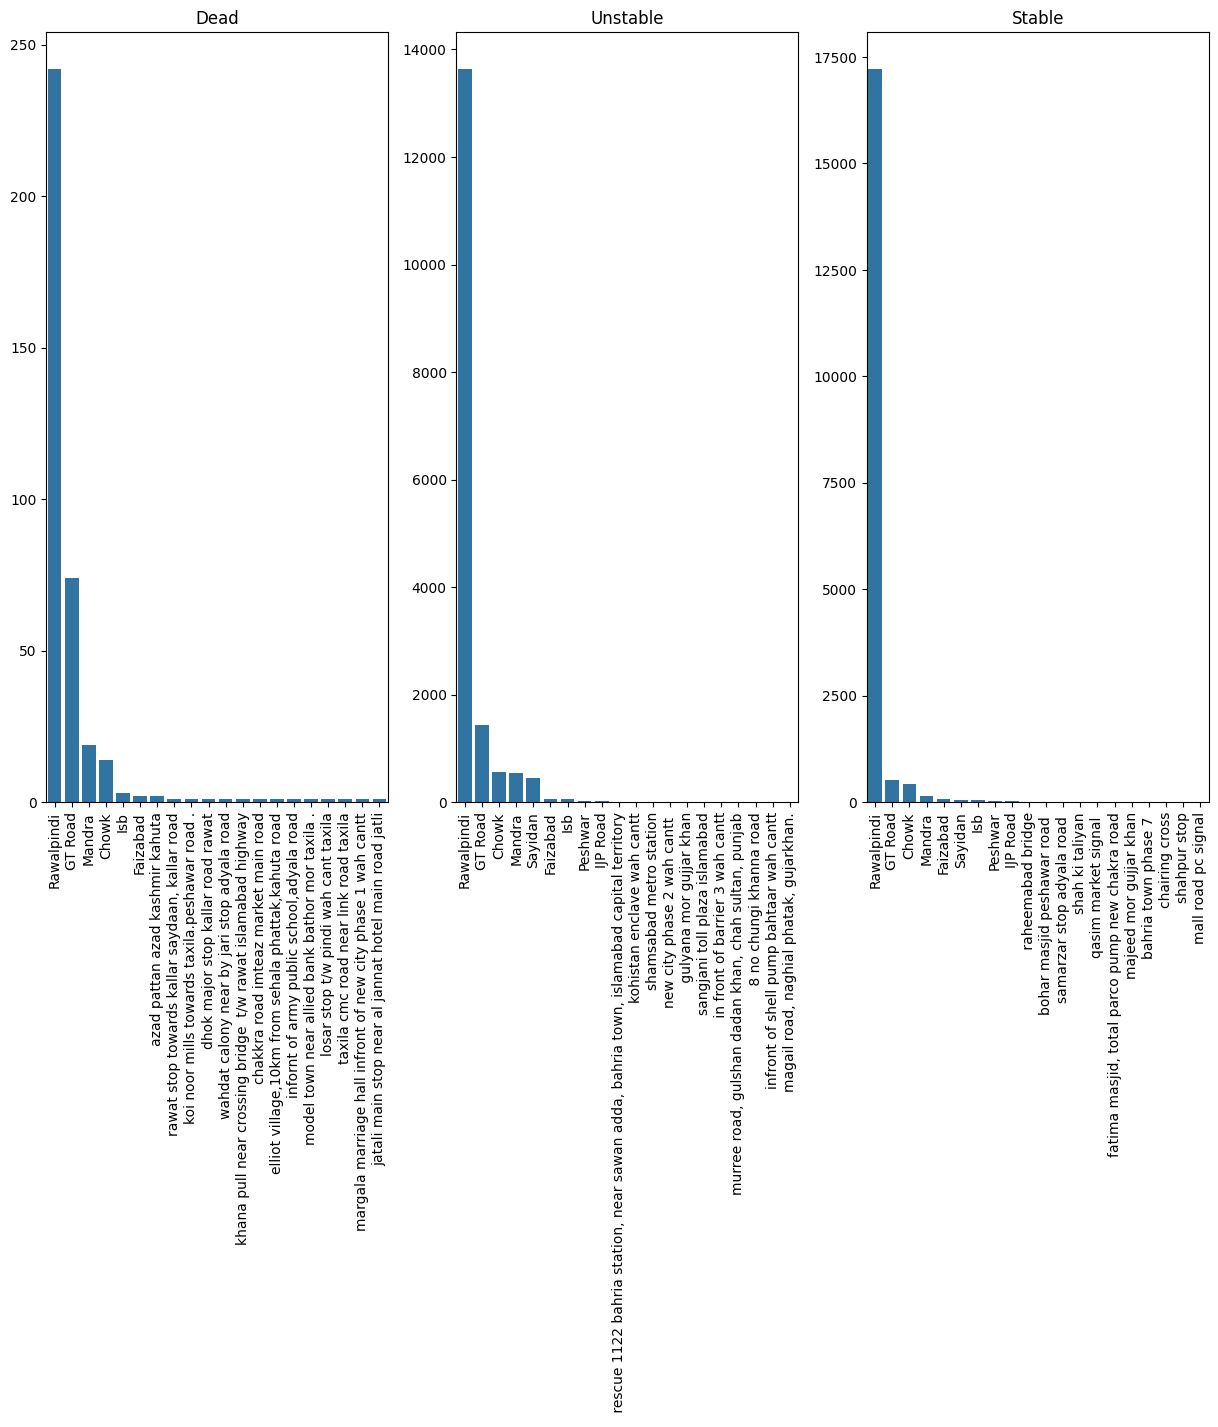

In [373]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
plt.subplots_adjust(hspace=.5)
rotate = 90

plot1 = sns.barplot(x=[x[0] for x in top_20_dead_zone], y=[x[1] for x in top_20_dead_zone], ax=axes[0])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=rotate)
plot1.set_title('Dead')

plot2 = sns.barplot(x=[x[0] for x in top_20_unstable_zone], y=[x[1] for x in top_20_unstable_zone], ax=axes[1])
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=rotate)
plot2.set_title('Unstable')

plot3 = sns.barplot(x=[x[0] for x in top_20_stable_zone], y=[x[1] for x in top_20_stable_zone], ax=axes[2])
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=rotate)
plot3.set_title('Stable')

### Looking for the most given reasoning for a accident

In [375]:
# rta_dataset['EmergencyArea'] = rta_dataset['Reason'].replace(to_replace=r".*\(.*\).*", value=" ", regex=True)
import nltk
nltk.download('stopwords')

rta_dataset['reason_tokenized'] = rta_dataset.apply(lambda row: ','.join(
    list(set([
        words.lower()
        for words in row['Reason'].split()
        if words not in stopwords.words('english') and words != " "
      ]))
    ), axis=1)

freq_reason_of_accident = [
    {status: Counter(rta_dataset[rta_dataset['PatientStatus'] == status]['reason_tokenized'].sum().split(','))} for status in to_encode[5]['PatientStatus']
]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [376]:
top_20_dead = freq_reason_of_accident[2]['Dead'].most_common()[:20]
top_20_unstable = freq_reason_of_accident[0]['Alive & unstable'].most_common()[:20]
top_20_stable = freq_reason_of_accident[1]['Alive & stable'].most_common()[:20]

Text(0.5, 1.0, 'Stable')

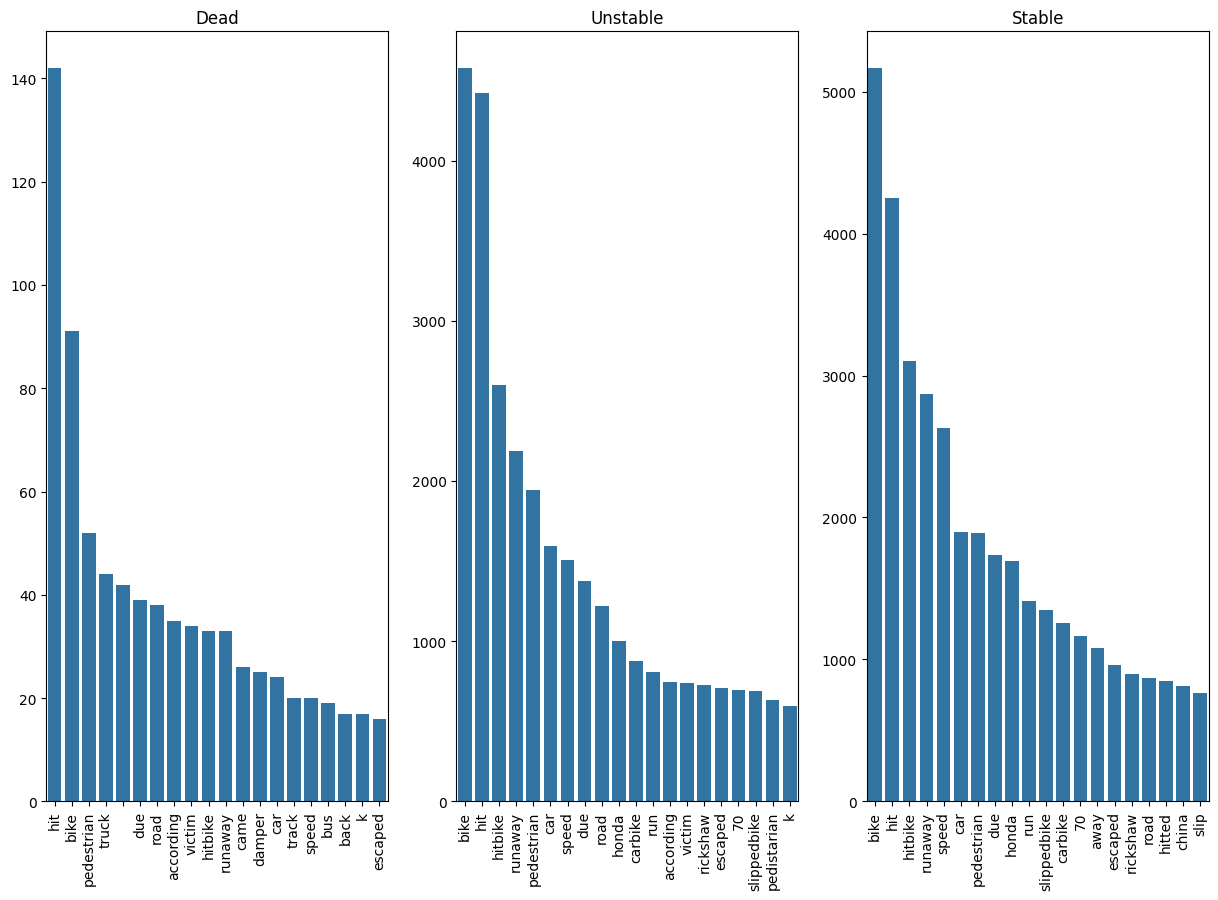

In [377]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
plt.subplots_adjust(hspace=.5)
rotate = 90

plot1 = sns.barplot(x=[x[0] for x in top_20_dead], y=[x[1] for x in top_20_dead], ax=axes[0])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=rotate)
plot1.set_title('Dead')

plot2 = sns.barplot(x=[x[0] for x in top_20_unstable], y=[x[1] for x in top_20_unstable], ax=axes[1])
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=rotate)
plot2.set_title('Unstable')

plot3 = sns.barplot(x=[x[0] for x in top_20_stable], y=[x[1] for x in top_20_stable], ax=axes[2])
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=rotate)
plot3.set_title('Stable')

### Encoding the values

In [307]:
# label encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

rta_dataset["InjuryType"] = le.fit_transform(rta_dataset["InjuryType"])
rta_dataset["Cause"] = le.fit_transform(rta_dataset["Cause"])
rta_dataset["EducationTitle"] = le.fit_transform(rta_dataset["EducationTitle"])
rta_dataset["PatientStatus"] = le.fit_transform(rta_dataset["PatientStatus"])

# Onehot Encoding
rta_dataset = pd.get_dummies(rta_dataset, columns=["Gender"], drop_first=True)

In [308]:
rta_dataset

,EcYear,CallTime,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,...,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Area,reason_tokenized,Gender_Male,Gender_Other
0,2020,2020-12-31 22:41:47,near aps school fort road rwp,1,27.0,Bike Slip,10.0,2,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,near aps school fort road rwp,"bike,slip",True,False
1,2020,2020-12-31 22:25:00,"infront of daig.com, near dha gate 2, gt road...",1,20.0,Car hit Footpath,12.0,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,"infront of daig.com, near dha gate 2, gt road...","car,hit,footpath",True,False
2,2020,2020-12-31 21:54:59,muhammadi chowk arshad bakery khyaban e sirsye...,1,48.0,Rickshaw hit with Car,10.0,1,3,3,...,1.0,0.0,0.0,0.0,0.0,0.0,muhammadi chowk arshad bakery khyaban e sirsye...,"rickshaw,hit,car",True,False
3,2020,2020-12-31 21:24:22,"gulzar e quaid, t/w katcheri near attock pump,...",1,45.0,Car hit Car and runaway,5.0,4,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,"gulzar e quaid, t/w katcheri near attock pump,...","car,hit,car,runaway",True,False
4,2020,2020-12-31 21:03:49,taaj company gawalmandi chowk liaqat baag road...,1,22.0,Unknown Bike hit Bike and runaway,5.0,4,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,taaj company gawalmandi chowk liaqat baag road...,"unknown,bike,hit,bike,runaway",True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46183,2023,2023-01-01 06:53:00,infront of mian g hotel gt road mandra,2,20.0,Sazuki RIT 2078 ny unknown truck ko pechay sey...,3.0,1,3,0,...,0.0,0.0,0.0,1.0,1.0,0.0,infront of mian g hotel gt road mandra,"sazuki,rit,2078,ny,unknown,truck,ko,pechay,sey...",True,False
46185,2023,2023-01-01 04:23:00,"barma shell depu dhoke munshi road, fazal town...",1,16.0,Bike slipped due to over speed.(RIN.6276) C D...,11.0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,"barma shell depu dhoke munshi road, fazal town...","bike,slipped,due,speed.(rin.6276),c,d,70.",True,False
46186,2023,2023-01-01 02:16:00,main bakra mandi chowk rwp,1,10.0,RLF-2193 coure and ICT-593 corolla car colliped,1.0,7,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,main bakra mandi chowk rwp,"rlf-2193,coure,ict-593,corolla,car,colliped",False,False
46187,2023,2023-01-01 02:02:00,"darbar adda, mandi morr, bus stop, ijp road, rwp",1,19.0,Bike slipped due to Over speed ( Bike no TSH ...,12.0,7,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,"darbar adda, mandi morr, bus stop, ijp road, rwp","bike,slipped,due,over,speed,(,bike,tsh,3505,ch...",True,False
